#### PCA(Principle Componet Analysis) - 주성분 분석

#### 여러개의 변수(특성 Feature)  대표할 수 있는 주성분 이라는 새로운 변수를 만듦

#### 여러개의 3D 이미지(공간)를 잘 설명할 수 있는 2D 이미지(그림자)를 찾는다.


#### 1단계 : 데이터 표주화(Standaridization)
```
각 변수의 평균을 0, 분산을 1로 만들어서 모든 데이터가 동일한 스케일
키(3자리)와 몸무게(2자리)
```

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# 예제데이터 붓꽃
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df = iris.data
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Text(0.5, 1.0, 'PCA of Iris Dataset')

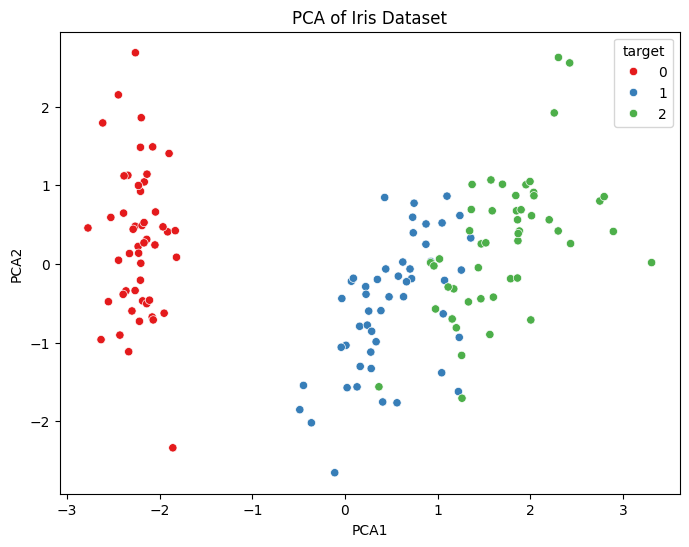

In [37]:
df_features = df.loc[:, df.columns != 'target']
df_features_scaled = StandardScaler().fit_transform(df_features)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_features_scaled)
df_pca = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
df_pca['target'] = df['target']
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='target', data=df_pca, palette='Set1')
plt.title('PCA of Iris Dataset')

In [39]:
X = df.loc[:,:"petal width (cm)"].values
# 표준화 진행
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

#### 2단계 : 공분산 행렬 계산 (Covariance Matrix)
```
공분산 : 두 변수가 함께 어떻게 변하는지를 나타내는 값
양수 : 한변수가 증가할때 같이 증가
음수 : 반대
공분산 행렬 : 모든 변수 쌍들의 공분산을 행렬로 정리한 것 --> 이 행렬을 통해서 데이터가 어떤 방향으로 퍼져 있는지 알수 있음
```

####  3단계 : 고유값과 고유벡터 계산
```
공분산 행렬을 이용해서 고유값 고유벡터 찾는다
고유값벡터 : 데이터가 어떤 방향으로 가장 크게 분산되어 있는지를 나타내는 방향 벡터, 이 방향이 새로운 축 즉 주성분
고유값 : 해당 고유벡터 방향으로 데이터가 얼마나 많이 퍼져있는지를 나타내는 힘의 크기, 이 값이 크면 그 방향이 데이터를 더 많이 설명한다는 의미

PCA 고유값의 크기 순서에 따라서  제1 주성분(PC1), 제2 주성분(PC2) 등..
PC1 데이터를 가장 잘 설명하는 축이고 PC2는 PC1  과 직각을 이루면서 그 다음으로 데이터를 잘 표현
```

#### 4단계 : 주성분 결정 및 데이터 변환
```
계산된  고유벡터축에 원래 데이터를 투영(projection)하여 차원을 축소함
붓꽃은 4개의 특성을 2개의 주성분(2차원)으로 변환해서 시각화
```

[0.72962445 0.22850762]


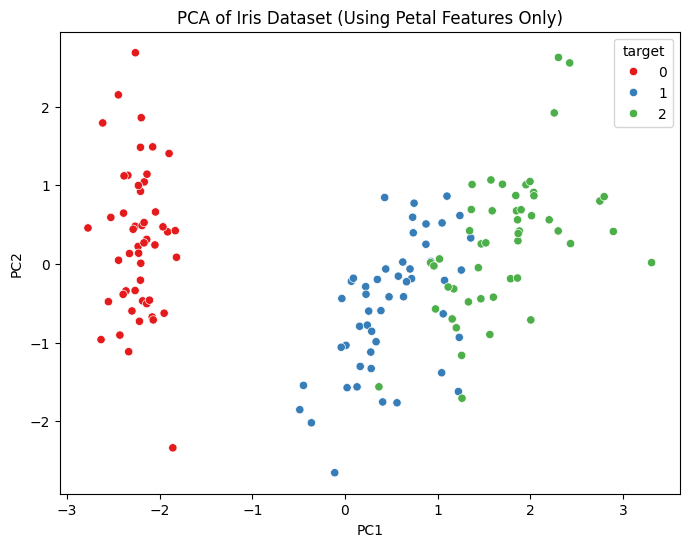

In [47]:
# 2 3 4 단계 : pca수행 및 데이터 변환
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalComponents
# 주성분  분석 결과를 DataFrame으로 변환
pc_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
pc_df['target'] = df['target']

# 각 주성분이 설명하는 분산의 양(고유값의 중요도)
print(pca.explained_variance_ratio_) # 주성분 2개 만으로도 전체 대비 약 95% 설명 가능
# 시각화
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pc_df, palette='Set1')
plt.title('PCA of Iris Dataset (Using Petal Features Only)')
plt.show()

In [79]:
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
# 데이터셋  예측
diabetes = datasets.load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. 적절한 데이터 전처리
X_scaled = StandardScaler().fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(x_train,y_train)
# 2 모델을 적용해서 score 를 확인
print(f'non pca train score : {rfr.score(x_train,y_train)}')
print(f'non pca train score : {rfr.score(x_test,y_test)}')
##############################################################
# 1. 적절한 데이터 전처리데이터를 가지고 PCA로 주성분을 적당한 개수로 설정해서 데이터를 변환해서
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=42)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(x_train_pca, y_train)
# 2 모델을 적용해서 score 를 확인
print(f' pca train score : {rfr.score(x_train_pca,y_train)}')
print(f' pca train score : {rfr.score(x_test_pca,y_test)}')

non pca train score : 0.5824891628627867
non pca train score : 0.46733581519667544
 pca train score : 0.4286288481744287
 pca train score : 0.30711274487765117


In [ ]:
# 하이퍼 파라메터 튜닝 giridsearch
# 학숩에 영향주는 모든 파라메터를  하이퍼 파라메터
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
# 데이터 셋 예측
diabetes = datasets.load_diabetes()
# 1. 적정한데이터 전처리
# 2. 모델을 적용해서 score를 확인
X = diabetes.data
y = diabetes.target
x_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x_scaled)
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()

param_grid = {
    'max_depth': [3, 5, 10, 12, 15],
    'max_features': ["sqrt", "log2"],
    'min_samples_split': [1,2,5,10],
    'min_samples_leaf': [1,3,5,7],
}
gridcv = GridSearchCV(model,return_train_score=True, param_grid=param_grid)
gridcv.fit(x_train, y_train)
print("Best parameters found: ", gridcv.best_params_)



Best parameters found:  {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2}


c:\Users\31799\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\31799\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\31799\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:

In [78]:
gridcv.best_score_, gridcv.best_params_, gridcv.best_estimator_.score(x_test, y_test)

(np.float64(0.3192512406316407),
 {'max_depth': 15,
  'max_features': 'sqrt',
  'min_samples_leaf': 5,
  'min_samples_split': 2},
 0.2843300033227958)